# Problem
Tonal measures the cable length as the user extends and retracts the cable during a workout. 
These measurements are used for many smart real-time features, including detecting reps and sets.

Detecting reps and sets with very high accuracy is fundamental to every user’s experience.
Beyond automatically tracking what a user did, many other features depend on reps and sets, such as dynamically adjusting the weight and playing certain video or audio in response to the user’s actions.

The files provided contain data collected from workouts on Tonal. 
1. Your first task is to clean this data to make it more useful as input to other downstream algorithms, like rep and set detection. (All of the problems in the data are artificially created, but they are realistic.)

2. After cleaning the data, detect the times that sets end. It will be difficult to detect them all accurately, and we don’t expect very high accuracy.


Data Format
Each file corresponds to a workout, and the data is sampled at about 50 hz. 
The file format stores multiple types of tabular data in one file. You can think of it as multiple CSVs interwoven together where rows are in roughly chronological order. The first lines are the headers for each type of data, and each line begins with its data type identifier, a short string. You can limit your attention to lines beginning with “MD”, which stands for “motor data”, and ignore the other lines. The columns are defined below.

“MD”​ - Data type identifier.
“sequence_number”​ - An integer that always increases as data is written to the file. 
“time_ms”​ - The time of measurement.The units are milliseconds since the system turned on. 
“position_in”​ - The length of cable the user has pulled out, in units of inches.

Deliverables
Please spend four hours or less. We prefer for you to send partially completed work and explain your next steps rather than spend too much time. You can use any language, but Python, C/C++, Java, Kotlin, or Go are preferred. Send questions to Brandt at brandt@tonal.com.

Please send us your code and a brief report, less than 3-4 pages explaining your process, choices, methods, and results. A notebook is ok. Given the limited time, we are less interested in accuracy, but more in what you tried, why, and what you would do next if you had more time.
This assignment, data, and intellectual property belong to Tonal and are confidential.


Importing libraries 

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# observing raw data 

In [455]:
raw = pd.read_csv("./tonal_data_assignment/workout1.csv")
raw.head(10)

,MD,sequence_number,time_ms,position_in
SW,sequence_number,movement_id,prev_weight_lb,suggested_weight_lb
FES,sequence_number,how_set_ended,NaN,NaN
RG,sequence_number,rep_goal,NaN,NaN
RA,sequence_number,NaN,NaN,NaN
MD,65972,3464940535,-0.038326,NaN
MD,65973,3464940555,-0.180451,NaN
MD,65974,3464940574,0.048110,NaN
MD,65975,3464940594,-0.295862,NaN
MD,65976,3464940615,0.097723,NaN
MD,65977,3464940635,0.228060,NaN


In [449]:
raw.describe()

,MD,sequence_number,time_ms,position_in
count,154876,154874,154653,16
unique,154873,154651,150909,9
top,sequence_number,12,25.0,26.0
freq,4,81,5,4


In [450]:
raw.dtypes

MD                 object
sequence_number    object
time_ms            object
position_in        object
dtype: object

# load_data: exclude the first four rows and relocate columns.

In [456]:
def load_data(path):
    data = pd.read_csv(path, usecols=list(range(4))[0:], skiprows =[1,2,3,4])
    return data

data = load_data("./tonal_data_assignment/workout1.csv")
data

,MD,sequence_number,time_ms,position_in
0,MD,65972.0,3464940535,-0.038326
1,MD,65973.0,3464940555,-0.180451
2,MD,65974.0,3464940574,0.048110
3,MD,65975.0,3464940594,-0.295862
4,MD,65976.0,3464940615,0.097723
...,...,...,...,...
154869,RG,221738.0,0,NaN
154870,MD,221739.0,3.46804e+09,0.185092
154871,RA,221740.0,NaN,NaN
154872,#version:3.0,NaN,NaN,NaN


# Saving last row which contains information about time 

In [457]:
def get_time(df):
    t = df.tail(1).MD.values[0]
    t = t[10:34]
    utc_time = datetime.strptime(t,'%b %d %H:%M:%S PST %Y')
    return utc_time

time = get_time(data)
time

datetime.datetime(2019, 12, 8, 17, 22, 49)

In [458]:
data.describe()

,sequence_number,position_in
count,154872.000000,154652.000000
mean,143886.502305,12.273995
std,44977.603665,20.948031
min,65972.000000,-0.956493
25%,104946.750000,-0.009154
50%,143876.500000,0.245350
75%,182846.250000,20.837047
max,221740.000000,99.433487


missing columns 

In [459]:
data.dtypes

MD                  object
sequence_number    float64
time_ms             object
position_in        float64
dtype: object

# data cleaning: convert time_ms to numeric data and only select rows with 'MD' values

In [460]:
def clean(df):
    df.time_ms = pd.to_numeric(df.time_ms, errors='coerce')
    df = df[df.MD == 'MD']
    return df

cleaned_data = clean(data)

In [461]:
cleaned_data.dtypes

MD                  object
sequence_number    float64
time_ms            float64
position_in        float64
dtype: object

# observing time_ms

In [462]:
cleaned_data.time_ms.describe()

count    1.546370e+05
mean     3.466264e+09
std      2.788966e+07
min     -1.994000e+03
25%      3.465714e+09
50%      3.466488e+09
75%      3.467262e+09
max      3.468035e+09
Name: time_ms, dtype: float64

In [466]:
min1 = cleaned_data[cleaned_data.time_ms > 0].time_ms.min()
min2 = cleaned_data.time_ms.min()
print(min1 , min2)

268.0 -1994.0


# Found anomaly in time_ms 

In [467]:
test[test.time_ms  == 268.0]

,MD,sequence_number,time_ms,position_in,new_time,recorded_date
138344,MD,205162.0,268.0,0.169899,-3.464940e+09,1.572358e+12


In [468]:
test = cleaned_data.loc[138340:138350]
test 

,MD,sequence_number,time_ms,position_in
138340,MD,205158.0,3.467705e+09,-0.003395
138341,MD,205159.0,3.467705e+09,0.205587
138342,MD,205160.0,3.467705e+09,0.294726
138343,MD,205161.0,3.467705e+09,-0.144116
138344,MD,205162.0,2.680000e+02,0.169899
138345,MD,205163.0,3.467705e+09,0.125185
138346,MD,205164.0,3.467705e+09,-0.064206
138347,MD,205165.0,3.467705e+09,0.150522
138348,MD,205166.0,3.467705e+09,0.215047
138349,MD,205167.0,3.467705e+09,0.131902


# Creating new_time column to represent time in which each row was sampled in ms 

In [470]:
def new_time(df):
    df["new_time"] = df.time_ms - df.head(1).time_ms.values[0]
    return df

new_time(cleaned_data)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MD,sequence_number,time_ms,position_in,new_time
0,MD,65972.0,3.464941e+09,-0.038326,0.0
1,MD,65973.0,3.464941e+09,-0.180451,20.0
2,MD,65974.0,3.464941e+09,0.048110,39.0
3,MD,65975.0,3.464941e+09,-0.295862,59.0
4,MD,65976.0,3.464941e+09,0.097723,80.0
...,...,...,...,...,...
154862,MD,221727.0,3.468035e+09,0.248732,3094640.0
154863,MD,221728.0,3.468035e+09,-0.256941,3094659.0
154864,MD,221729.0,3.468035e+09,0.077022,3094680.0
154866,MD,221732.0,3.468035e+09,-0.075056,3094700.0


# Creating recorded_date column that represents the date in which each row was recorded in ms (relative to its time in last row)

In [471]:
def recorded_ms(df):
    ms = get_time(data)
    millisecs = (ms - datetime(1970, 1, 1)) // timedelta(milliseconds=1)
    df['recorded_date'] = millisecs - cleaned_data.tail(1).new_time.values[0] + cleaned_data.new_time
    return df

recorded_ms(cleaned_data)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MD,sequence_number,time_ms,position_in,new_time,recorded_date
0,MD,65972.0,3.464941e+09,-0.038326,0.0,1.575823e+12
1,MD,65973.0,3.464941e+09,-0.180451,20.0,1.575823e+12
2,MD,65974.0,3.464941e+09,0.048110,39.0,1.575823e+12
3,MD,65975.0,3.464941e+09,-0.295862,59.0,1.575823e+12
4,MD,65976.0,3.464941e+09,0.097723,80.0,1.575823e+12
...,...,...,...,...,...,...
154862,MD,221727.0,3.468035e+09,0.248732,3094640.0,1.575826e+12
154863,MD,221728.0,3.468035e+09,-0.256941,3094659.0,1.575826e+12
154864,MD,221729.0,3.468035e+09,0.077022,3094680.0,1.575826e+12
154866,MD,221732.0,3.468035e+09,-0.075056,3094700.0,1.575826e+12


In [472]:
cleaned_data.dtypes

MD                  object
sequence_number    float64
time_ms            float64
position_in        float64
new_time           float64
recorded_date      float64
dtype: object

In [473]:
cleaned_data.new_time.describe() # same anomaly (negative value needs to be handled)

count    1.546370e+05
mean     1.323218e+06
std      2.788966e+07
min     -3.464943e+09
25%      7.735600e+05
50%      1.547160e+06
75%      2.321040e+06
max      3.094720e+06
Name: new_time, dtype: float64

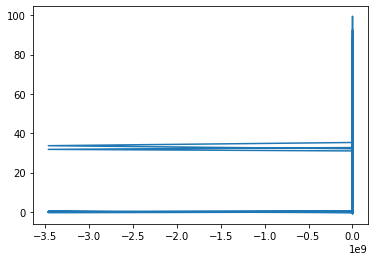

In [474]:
test = cleaned_data.iloc[0:154637]
plt.plot(test.new_time, test.position_in)

This does not give a very good insight. position_in needs to be observed 

# Observing position_in

In [475]:
cleaned_data.position_in.describe()

count    154637.000000
mean         12.272819
std          20.948571
min          -0.956493
25%          -0.009171
50%           0.245308
75%          20.831542
max          99.433487
Name: position_in, dtype: float64

# Visualization!


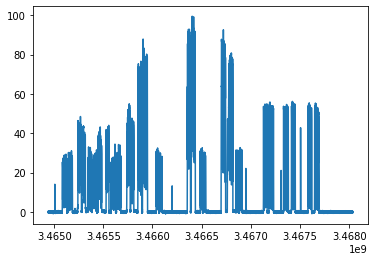

In [478]:
def makeViz(df):
    df = df[df.new_time >= 0] # handle anomaly here
    plt.plot(df.time_ms,df.position_in)
    
makeViz(cleaned_data)

# smaller data size

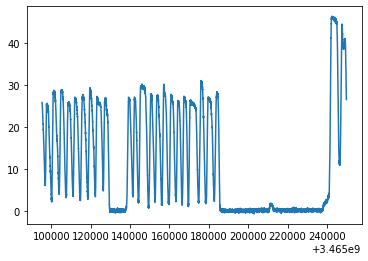

In [479]:
t = cleaned_data[cleaned_data.new_time >= 0]
x = t[int(len(t) * 0.05):int(len(t) * 0.1)]
plt.plot(x.time_ms,x.position_in)
    

# Get average position_in values in every 1 second (assumption: a person cannot complete a rep in less than a second)

In [509]:
avg_pos = []
def get_avg(df):
    for i in range(0, len(df) - 50, 50):
        avg_pos.append(np.mean(df.position_in[i:i+50]))
    return avg_pos 
    

In [504]:
mean = np.mean(avg_pos)
minimum = min(avg_pos)
maximum = max(avg_pos)
median = np.median(avg_pos)
print(mean, minimum, maximum, median)

12.275764747166882 -0.08645422 94.83189306000003 0.08672735


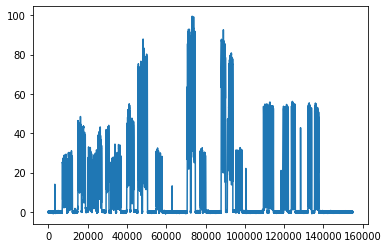

In [481]:
plt.plot(cleaned_data.position_in)

# A very bruteforce way..
# explanation: iterate through entire data and find when the previous position in inches is greater or equal to 12 (roughly selected according to visualizaiton and average position_in in 1 second) if the next position inch is less than or  equal to 1, set has ended. 

In [508]:
sets_ended = []
def get_ms(df):
    for (i,row) in df.iterrows():
        if(df.position_in[i] >= 12 and df.position_in[i+1] <= 1):
            sets_ended.append(df.recorded_date[i])
    return sets_ended
        
get_ms(cleaned_data)

[1575822740680.0,
 1575823178359.0,
 1575823933740.0,
 1575824683160.0,
 1575825041640.0,
 1575825239499.0]

In [506]:
final_output = []
def get_date(ls):
    for i in range(len(ls)):
        final_output.append(pd.to_datetime(ls[i], unit='ms').to_pydatetime())
    return final_output
    
get_date(sets_ended)

[datetime.datetime(2019, 12, 8, 16, 32, 20, 680000),
 datetime.datetime(2019, 12, 8, 16, 39, 38, 359000),
 datetime.datetime(2019, 12, 8, 16, 52, 13, 740000),
 datetime.datetime(2019, 12, 8, 17, 4, 43, 160000),
 datetime.datetime(2019, 12, 8, 17, 10, 41, 640000),
 datetime.datetime(2019, 12, 8, 17, 13, 59, 499000)]

applying functions to all data (total of 6)

# What to do next: 

A lot of data cleaning and adding new column process is in function format so that each functions can be used and applied to other files. However, this is not the best way to get the end time for each set. There were a lot of assumptions I made and optimization was not in consideraiton due to the time limit. Roughly selecting position_in value to represent the length in which cable is not being used based on visuazliation can cause many problems depending on what exercises the user is currently on. Regardless, I will create a for loop ranging from 0 to 5, and load in all the files using load_data() function by string concatenation. Then, i will run the functions listed above to get the final output for all files. 